In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
# Steps:
# 1. Read data
# 2. Standardize features in X
# 3. Get train and test split
# 4. Initialize weights and bias
# 5. Implement activation function
# 6. Implement cost function (cross entropy loss)
# 7. Implement gradient calculation for weights and bias
# 8. Implement prediction and predict
# 9. Calculate TPR, FPR, TP, FP, TN, FN, Precision, Recall, Accuracy

In [4]:
# Epsilon
epsilon = 1e-6
# Learning rate
alpha = 0.01
# number of iterations
n_iter = 1000

In [5]:
spam_df = pd.read_csv('data/emails.csv')

In [6]:
sdf_in = spam_df.drop(labels = ['Prediction', 'Email No.'], axis = 1).to_numpy()

In [7]:
sdf_out = pd.DataFrame(spam_df['Prediction']).to_numpy()

In [8]:
def mean_and_std(X):
    return np.mean(X, 0, keepdims=True), np.std(X, 0, keepdims=True)

In [9]:
def normalize(X):
    mean, std = mean_and_std(X)
    X_normal = (X - mean)/(std+epsilon)
    return X_normal

In [10]:
sdf_in = normalize(sdf_in)

In [11]:
# Training set 1
X_train1 = sdf_in[1000:5000]
X_test1 = sdf_in[:1000]
Y_train1 = sdf_out[1000:5000]
Y_test1 = sdf_out[:1000]
# Training set 2
X_train2 = np.concatenate([sdf_in[:1000], sdf_in[2000:]])
X_test2 = sdf_in[1000:2000]
Y_train2 = np.concatenate([sdf_out[:1000], sdf_out[2000:]])
Y_test2 = sdf_out[1000:2000]
# Training set 3
X_train3 = np.concatenate([sdf_in[:2000], sdf_in[3000:]])
X_test3 = sdf_in[2000:3000]
Y_train3 = np.concatenate([sdf_out[:2000], sdf_out[3000:]])
Y_test3 = sdf_out[2000:3000]
# Training set 4
X_train4 = np.concatenate([sdf_in[:3000], sdf_in[4000:]])
X_test4 = sdf_in[3000:4000]
Y_train4 = np.concatenate([sdf_out[:3000], sdf_out[4000:]])
Y_test4 = sdf_out[3000:4000]
# Training set 5
X_train5 = sdf_in[:4000]
X_test5 = sdf_in[4000:]
Y_train5 = sdf_out[:4000]
Y_test5 = sdf_out[4000:]

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
def likelihood(W, X, b):
    return sigmoid(np.dot(W, X.T) + b)

In [14]:
def predict_and_give_metrics(X, Y, w, b, c=0.5):
    Y_hat = likelihood(w, X, b)
    Y_hat = (Y_hat >= c) + 0
    tp = np.sum(np.logical_and(Y==1, Y_hat.T==1))
    fp = np.sum(np.logical_and(Y==0, Y_hat.T==1))
    tn = np.sum(np.logical_and(Y==0, Y_hat.T==0))
    fn = np.sum(np.logical_and(Y==1, Y_hat.T==0))
    accuracy = np.sum(Y_hat.T == Y)/len(Y)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return tp, tn, fp, fn, accuracy, precision, recall

In [15]:
def train_logistic_regression(X, Y, alpha, n_iter):
    w = np.zeros((1, X.shape[1]))
    b = 0
    n = X.shape[0]
    for i in range(n_iter):
        print("Iteration No: " + str(i))
        # Calculate output
        y_hat = likelihood(w, X, b)
        # Calculate cost
        cost = (-1/n)*np.sum(Y.T*np.log(y_hat+epsilon)+(1-Y.T)*np.log(1-y_hat+epsilon))
        print("Cost: " + str(cost))
        # Calculate gradients
        dw = (1/n)*(np.dot(X.T, (y_hat-Y.T).T))
        db = (1/n)*(np.sum((y_hat-Y.T).T))
        # Update w and b
        w = w - alpha * dw.T
        b = b - alpha * db
    return w, b

In [16]:
# Train set 1
w1, b1 = train_logistic_regression(X_train1, Y_train1, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.66515907620197
Iteration No: 2
Cost: 0.6454542333116888
Iteration No: 3
Cost: 0.6292049274562933
Iteration No: 4
Cost: 0.6152143496922898
Iteration No: 5
Cost: 0.6029030760079997
Iteration No: 6
Cost: 0.5919024443916053
Iteration No: 7
Cost: 0.5819539596617886
Iteration No: 8
Cost: 0.5728679536652839
Iteration No: 9
Cost: 0.5645011629719895
Iteration No: 10
Cost: 0.5567429301767581
Iteration No: 11
Cost: 0.549506170859003
Iteration No: 12
Cost: 0.5427212346028036
Iteration No: 13
Cost: 0.5363316165782915
Iteration No: 14
Cost: 0.5302908935379651
Iteration No: 15
Cost: 0.5245604915204347
Iteration No: 16
Cost: 0.5191080311113749
Iteration No: 17
Cost: 0.5139060816045447
Iteration No: 18
Cost: 0.5089312097140947
Iteration No: 19
Cost: 0.5041632438243646
Iteration No: 20
Cost: 0.4995846982364555
Iteration No: 21
Cost: 0.495180317756083
Iteration No: 22
Cost: 0.4909367138998898
Iteration No: 23
Cost: 0.48684207163852
Iteratio

Cost: 0.2742435056813114
Iteration No: 208
Cost: 0.2738595683948267
Iteration No: 209
Cost: 0.2734781204501957
Iteration No: 210
Cost: 0.2730991347580741
Iteration No: 211
Cost: 0.2727225846326589
Iteration No: 212
Cost: 0.2723484437841962
Iteration No: 213
Cost: 0.27197668631164995
Iteration No: 214
Cost: 0.27160728669552886
Iteration No: 215
Cost: 0.27124021979086615
Iteration No: 216
Cost: 0.27087546082034974
Iteration No: 217
Cost: 0.2705129853675987
Iteration No: 218
Cost: 0.27015276937058297
Iteration No: 219
Cost: 0.26979478911518257
Iteration No: 220
Cost: 0.2694390212288833
Iteration No: 221
Cost: 0.2690854426746064
Iteration No: 222
Cost: 0.26873403074466706
Iteration No: 223
Cost: 0.2683847630548612
Iteration No: 224
Cost: 0.26803761753867594
Iteration No: 225
Cost: 0.2676925724416217
Iteration No: 226
Cost: 0.26734960631568233
Iteration No: 227
Cost: 0.2670086980138815
Iteration No: 228
Cost: 0.26666982668496214
Iteration No: 229
Cost: 0.2663329717681758
Iteration No: 230
C

Cost: 0.22660424453456363
Iteration No: 407
Cost: 0.22645075678405185
Iteration No: 408
Cost: 0.226297777024325
Iteration No: 409
Cost: 0.22614530222182028
Iteration No: 410
Cost: 0.22599332936801664
Iteration No: 411
Cost: 0.2258418554791749
Iteration No: 412
Cost: 0.22569087759608175
Iteration No: 413
Cost: 0.2255403927837964
Iteration No: 414
Cost: 0.2253903981314006
Iteration No: 415
Cost: 0.22524089075175208
Iteration No: 416
Cost: 0.22509186778124032
Iteration No: 417
Cost: 0.22494332637954637
Iteration No: 418
Cost: 0.22479526372940453
Iteration No: 419
Cost: 0.2246476770363678
Iteration No: 420
Cost: 0.22450056352857586
Iteration No: 421
Cost: 0.22435392045652608
Iteration No: 422
Cost: 0.224207745092847
Iteration No: 423
Cost: 0.22406203473207495
Iteration No: 424
Cost: 0.22391678669043322
Iteration No: 425
Cost: 0.22377199830561398
Iteration No: 426
Cost: 0.22362766693656283
Iteration No: 427
Cost: 0.22348378996326576
Iteration No: 428
Cost: 0.22334036478653907
Iteration No: 

Cost: 0.2030021755498447
Iteration No: 609
Cost: 0.20291195626096112
Iteration No: 610
Cost: 0.20282192639215316
Iteration No: 611
Cost: 0.20273208518938224
Iteration No: 612
Cost: 0.20264243190294132
Iteration No: 613
Cost: 0.20255296578742327
Iteration No: 614
Cost: 0.20246368610168963
Iteration No: 615
Cost: 0.2023745921088394
Iteration No: 616
Cost: 0.20228568307617845
Iteration No: 617
Cost: 0.2021969582751888
Iteration No: 618
Cost: 0.20210841698149837
Iteration No: 619
Cost: 0.20202005847485116
Iteration No: 620
Cost: 0.20193188203907744
Iteration No: 621
Cost: 0.20184388696206412
Iteration No: 622
Cost: 0.20175607253572575
Iteration No: 623
Cost: 0.20166843805597537
Iteration No: 624
Cost: 0.20158098282269601
Iteration No: 625
Cost: 0.20149370613971193
Iteration No: 626
Cost: 0.20140660731476062
Iteration No: 627
Cost: 0.20131968565946476
Iteration No: 628
Cost: 0.20123294048930443
Iteration No: 629
Cost: 0.20114637112358943
Iteration No: 630
Cost: 0.20105997688543267
Iteration

Cost: 0.18846407049486774
Iteration No: 801
Cost: 0.18840012162656355
Iteration No: 802
Cost: 0.18833627103449957
Iteration No: 803
Cost: 0.18827251843093507
Iteration No: 804
Cost: 0.1882088635293827
Iteration No: 805
Cost: 0.18814530604460095
Iteration No: 806
Cost: 0.18808184569258737
Iteration No: 807
Cost: 0.18801848219057118
Iteration No: 808
Cost: 0.18795521525700667
Iteration No: 809
Cost: 0.1878920446115658
Iteration No: 810
Cost: 0.1878289699751318
Iteration No: 811
Cost: 0.18776599106979172
Iteration No: 812
Cost: 0.18770310761883008
Iteration No: 813
Cost: 0.1876403193467219
Iteration No: 814
Cost: 0.18757762597912603
Iteration No: 815
Cost: 0.18751502724287844
Iteration No: 816
Cost: 0.18745252286598557
Iteration No: 817
Cost: 0.1873901125776179
Iteration No: 818
Cost: 0.18732779610810307
Iteration No: 819
Cost: 0.1872655731889197
Iteration No: 820
Cost: 0.18720344355269086
Iteration No: 821
Cost: 0.1871414069331776
Iteration No: 822
Cost: 0.1870794630652725
Iteration No: 

Cost: 0.1775628841639417
Iteration No: 996
Cost: 0.17751385101522732
Iteration No: 997
Cost: 0.1774648772238367
Iteration No: 998
Cost: 0.17741596265398135
Iteration No: 999
Cost: 0.17736710717033297


In [54]:
_, _, _, _, acc1, pre1, rec1 = predict_and_give_metrics(X_test1, Y_test1, w1, b1)
acc1, pre1, rec1

(0.913, 0.9196141479099679, 0.8218390804597702)

In [18]:
# Train set 2
w2, b2 = train_logistic_regression(X_train2, Y_train2, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.6652478425602049
Iteration No: 2
Cost: 0.6453694614140831
Iteration No: 3
Cost: 0.6290331492444783
Iteration No: 4
Cost: 0.6150078922248251
Iteration No: 5
Cost: 0.6026889830397388
Iteration No: 6
Cost: 0.5916962612754062
Iteration No: 7
Cost: 0.5817667492714673
Iteration No: 8
Cost: 0.5727091857097428
Iteration No: 9
Cost: 0.5643797031823812
Iteration No: 10
Cost: 0.556667268735119
Iteration No: 11
Cost: 0.5494843913884506
Iteration No: 12
Cost: 0.5427609240561432
Iteration No: 13
Cost: 0.536439786658692
Iteration No: 14
Cost: 0.5304739320309574
Iteration No: 15
Cost: 0.5248241427845485
Iteration No: 16
Cost: 0.519457399346484
Iteration No: 17
Cost: 0.5143456500051515
Iteration No: 18
Cost: 0.5094648697555197
Iteration No: 19
Cost: 0.5047943303714274
Iteration No: 20
Cost: 0.5003160274383373
Iteration No: 21
Cost: 0.4960142256826855
Iteration No: 22
Cost: 0.49187509459837214
Iteration No: 23
Cost: 0.4878864137956601
Iter

Iteration No: 195
Cost: 0.2849066848243074
Iteration No: 196
Cost: 0.28448554915977675
Iteration No: 197
Cost: 0.284067209795488
Iteration No: 198
Cost: 0.28365163561182216
Iteration No: 199
Cost: 0.2832387959624839
Iteration No: 200
Cost: 0.28282866066555234
Iteration No: 201
Cost: 0.2824211999947269
Iteration No: 202
Cost: 0.28201638467076734
Iteration No: 203
Cost: 0.2816141858531198
Iteration No: 204
Cost: 0.2812145751317267
Iteration No: 205
Cost: 0.28081752451901376
Iteration No: 206
Cost: 0.28042300644205237
Iteration No: 207
Cost: 0.28003099373489054
Iteration No: 208
Cost: 0.2796414596310506
Iteration No: 209
Cost: 0.27925437775618717
Iteration No: 210
Cost: 0.27886972212090483
Iteration No: 211
Cost: 0.278487467113728
Iteration No: 212
Cost: 0.27810758749422215
Iteration No: 213
Cost: 0.2777300583862615
Iteration No: 214
Cost: 0.27735485527144016
Iteration No: 215
Cost: 0.2769819539826231
Iteration No: 216
Cost: 0.2766113306976334
Iteration No: 217
Cost: 0.2762429619330734
It

Iteration No: 400
Cost: 0.23213286423961146
Iteration No: 401
Cost: 0.23197072818632816
Iteration No: 402
Cost: 0.23180912915212618
Iteration No: 403
Cost: 0.23164806394527657
Iteration No: 404
Cost: 0.2314875294002582
Iteration No: 405
Cost: 0.2313275223774871
Iteration No: 406
Cost: 0.23116803976304914
Iteration No: 407
Cost: 0.23100907846843652
Iteration No: 408
Cost: 0.23085063543028725
Iteration No: 409
Cost: 0.23069270761012786
Iteration No: 410
Cost: 0.23053529199411948
Iteration No: 411
Cost: 0.23037838559280727
Iteration No: 412
Cost: 0.2302219854408723
Iteration No: 413
Cost: 0.23006608859688749
Iteration No: 414
Cost: 0.22991069214307563
Iteration No: 415
Cost: 0.2297557931850712
Iteration No: 416
Cost: 0.22960138885168438
Iteration No: 417
Cost: 0.22944747629466855
Iteration No: 418
Cost: 0.2292940526884904
Iteration No: 419
Cost: 0.22914111523010297
Iteration No: 420
Cost: 0.228988661138721
Iteration No: 421
Cost: 0.22883668765559978
Iteration No: 422
Cost: 0.2286851920438

Iteration No: 615
Cost: 0.20599612870613856
Iteration No: 616
Cost: 0.20590356101461005
Iteration No: 617
Cost: 0.20581118448812444
Iteration No: 618
Cost: 0.20571899838759258
Iteration No: 619
Cost: 0.20562700197807526
Iteration No: 620
Cost: 0.2055351945287532
Iteration No: 621
Cost: 0.2054435753128974
Iteration No: 622
Cost: 0.20535214360783982
Iteration No: 623
Cost: 0.2052608986949441
Iteration No: 624
Cost: 0.2051698398595765
Iteration No: 625
Cost: 0.2050789663910776
Iteration No: 626
Cost: 0.2049882775827334
Iteration No: 627
Cost: 0.20489777273174753
Iteration No: 628
Cost: 0.20480745113921303
Iteration No: 629
Cost: 0.20471731211008468
Iteration No: 630
Cost: 0.20462735495315157
Iteration No: 631
Cost: 0.2045375789810099
Iteration No: 632
Cost: 0.20444798351003582
Iteration No: 633
Cost: 0.2043585678603587
Iteration No: 634
Cost: 0.20426933135583455
Iteration No: 635
Cost: 0.20418027332401972
Iteration No: 636
Cost: 0.20409139309614482
Iteration No: 637
Cost: 0.20400269000708

Cost: 0.1899434015453741
Iteration No: 825
Cost: 0.18987924241441473
Iteration No: 826
Cost: 0.18981517934625042
Iteration No: 827
Cost: 0.18975121207093193
Iteration No: 828
Cost: 0.18968734031962342
Iteration No: 829
Cost: 0.18962356382459603
Iteration No: 830
Cost: 0.1895598823192222
Iteration No: 831
Cost: 0.1894962955379696
Iteration No: 832
Cost: 0.18943280321639516
Iteration No: 833
Cost: 0.18936940509113945
Iteration No: 834
Cost: 0.1893061008999206
Iteration No: 835
Cost: 0.1892428903815288
Iteration No: 836
Cost: 0.18917977327582036
Iteration No: 837
Cost: 0.18911674932371217
Iteration No: 838
Cost: 0.18905381826717588
Iteration No: 839
Cost: 0.18899097984923238
Iteration No: 840
Cost: 0.18892823381394636
Iteration No: 841
Cost: 0.18886557990642036
Iteration No: 842
Cost: 0.18880301787278972
Iteration No: 843
Cost: 0.18874054746021693
Iteration No: 844
Cost: 0.18867816841688612
Iteration No: 845
Cost: 0.1886158804919977
Iteration No: 846
Cost: 0.18855368343576312
Iteration No

In [55]:
_, _, _, _, acc2, pre2, rec2 = predict_and_give_metrics(X_test2, Y_test2, w2, b2)
acc2, pre2, rec2

(0.93, 0.9389312977099237, 0.82)

In [20]:
# Train set 3
w3, b3 = train_logistic_regression(X_train3, Y_train3, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.6658884532054534
Iteration No: 2
Cost: 0.6465105258515883
Iteration No: 3
Cost: 0.6304373329701898
Iteration No: 4
Cost: 0.6164968994529718
Iteration No: 5
Cost: 0.6041497747182198
Iteration No: 6
Cost: 0.5930605097121662
Iteration No: 7
Cost: 0.5829935486946176
Iteration No: 8
Cost: 0.5737740958333981
Iteration No: 9
Cost: 0.5652682669965425
Iteration No: 10
Cost: 0.5573712057273974
Iteration No: 11
Cost: 0.549999330024024
Iteration No: 12
Cost: 0.543085021351683
Iteration No: 13
Cost: 0.5365728673916206
Iteration No: 14
Cost: 0.5304169389563369
Iteration No: 15
Cost: 0.5245787773352072
Iteration No: 16
Cost: 0.5190258817201802
Iteration No: 17
Cost: 0.5137305557714928
Iteration No: 18
Cost: 0.5086690165651311
Iteration No: 19
Cost: 0.5038206981366284
Iteration No: 20
Cost: 0.49916770129866683
Iteration No: 21
Cost: 0.49469435475240686
Iteration No: 22
Cost: 0.4903868618211842
Iteration No: 23
Cost: 0.48623301373106576
I

Cost: 0.27551820986484904
Iteration No: 197
Cost: 0.27509875797153555
Iteration No: 198
Cost: 0.2746821718588343
Iteration No: 199
Cost: 0.27426841896590454
Iteration No: 200
Cost: 0.27385746722978266
Iteration No: 201
Cost: 0.27344928507591154
Iteration No: 202
Cost: 0.2730438414088867
Iteration No: 203
Cost: 0.2726411056034136
Iteration No: 204
Cost: 0.27224104749547023
Iteration No: 205
Cost: 0.27184363737367007
Iteration No: 206
Cost: 0.27144884597081936
Iteration No: 207
Cost: 0.2710566444556641
Iteration No: 208
Cost: 0.270667004424821
Iteration No: 209
Cost: 0.27027989789488893
Iteration No: 210
Cost: 0.2698952972947337
Iteration No: 211
Cost: 0.2695131754579452
Iteration No: 212
Cost: 0.26913350561545824
Iteration No: 213
Cost: 0.2687562613883364
Iteration No: 214
Cost: 0.2683814167807129
Iteration No: 215
Cost: 0.26800894617288434
Iteration No: 216
Cost: 0.26763882431455444
Iteration No: 217
Cost: 0.2672710263182229
Iteration No: 218
Cost: 0.2669055276527165
Iteration No: 219


Cost: 0.22595948951869632
Iteration No: 387
Cost: 0.2257927044105685
Iteration No: 388
Cost: 0.22562650102189796
Iteration No: 389
Cost: 0.2254608757379104
Iteration No: 390
Cost: 0.2252958249752681
Iteration No: 391
Cost: 0.2251313451817181
Iteration No: 392
Cost: 0.22496743283574566
Iteration No: 393
Cost: 0.22480408444623254
Iteration No: 394
Cost: 0.2246412965521192
Iteration No: 395
Cost: 0.22447906572207238
Iteration No: 396
Cost: 0.22431738855415678
Iteration No: 397
Cost: 0.224156261675511
Iteration No: 398
Cost: 0.22399568174202839
Iteration No: 399
Cost: 0.2238356454380415
Iteration No: 400
Cost: 0.22367614947601125
Iteration No: 401
Cost: 0.2235171905962203
Iteration No: 402
Cost: 0.22335876556647
Iteration No: 403
Cost: 0.22320087118178192
Iteration No: 404
Cost: 0.22304350426410285
Iteration No: 405
Cost: 0.2228866616620145
Iteration No: 406
Cost: 0.2227303402504461
Iteration No: 407
Cost: 0.22257453693039125
Iteration No: 408
Cost: 0.22241924862862875
Iteration No: 409
Co

Iteration No: 585
Cost: 0.20094345828224233
Iteration No: 586
Cost: 0.20084741048620122
Iteration No: 587
Cost: 0.20075157548185427
Iteration No: 588
Cost: 0.20065595239244
Iteration No: 589
Cost: 0.2005605403463444
Iteration No: 590
Cost: 0.20046533847706288
Iteration No: 591
Cost: 0.2003703459231619
Iteration No: 592
Cost: 0.20027556182824116
Iteration No: 593
Cost: 0.20018098534089585
Iteration No: 594
Cost: 0.20008661561467977
Iteration No: 595
Cost: 0.1999924518080683
Iteration No: 596
Cost: 0.19989849308442212
Iteration No: 597
Cost: 0.19980473861195072
Iteration No: 598
Cost: 0.19971118756367662
Iteration No: 599
Cost: 0.19961783911740003
Iteration No: 600
Cost: 0.19952469245566343
Iteration No: 601
Cost: 0.19943174676571665
Iteration No: 602
Cost: 0.19933900123948234
Iteration No: 603
Cost: 0.19924645507352173
Iteration No: 604
Cost: 0.19915410746900045
Iteration No: 605
Cost: 0.1990619576316551
Iteration No: 606
Cost: 0.19897000477175947
Iteration No: 607
Cost: 0.1988782481040

Cost: 0.1838378072019173
Iteration No: 805
Cost: 0.18377373918005435
Iteration No: 806
Cost: 0.18370977049194365
Iteration No: 807
Cost: 0.18364590084603416
Iteration No: 808
Cost: 0.1835821299520296
Iteration No: 809
Cost: 0.18351845752088183
Iteration No: 810
Cost: 0.18345488326478335
Iteration No: 811
Cost: 0.18339140689716113
Iteration No: 812
Cost: 0.1833280281326691
Iteration No: 813
Cost: 0.183264746687182
Iteration No: 814
Cost: 0.18320156227778828
Iteration No: 815
Cost: 0.18313847462278346
Iteration No: 816
Cost: 0.1830754834416638
Iteration No: 817
Cost: 0.1830125884551192
Iteration No: 818
Cost: 0.18294978938502712
Iteration No: 819
Cost: 0.1828870859544457
Iteration No: 820
Cost: 0.18282447788760772
Iteration No: 821
Cost: 0.18276196490991378
Iteration No: 822
Cost: 0.18269954674792616
Iteration No: 823
Cost: 0.18263722312936245
Iteration No: 824
Cost: 0.1825749937830892
Iteration No: 825
Cost: 0.18251285843911566
Iteration No: 826
Cost: 0.18245081682858774
Iteration No: 8

In [56]:
_, _, _, _, acc3, pre3, rec3 = predict_and_give_metrics(X_test3, Y_test3, w3, b3)
acc3, pre3, rec3

(0.92, 0.935374149659864, 0.8184523809523809)

In [22]:
# Train set 4
w4, b4 = train_logistic_regression(X_train4, Y_train4, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.6637200229991761
Iteration No: 2
Cost: 0.6433988217661678
Iteration No: 3
Cost: 0.6267984462479326
Iteration No: 4
Cost: 0.6125471228224187
Iteration No: 5
Cost: 0.6000164055026042
Iteration No: 6
Cost: 0.5888242109238447
Iteration No: 7
Cost: 0.5787086419947521
Iteration No: 8
Cost: 0.5694789373813315
Iteration No: 9
Cost: 0.5609908901523659
Iteration No: 10
Cost: 0.5531326092612336
Iteration No: 11
Cost: 0.5458155227844326
Iteration No: 12
Cost: 0.5389683641039822
Iteration No: 13
Cost: 0.5325329912832872
Iteration No: 14
Cost: 0.5264613948507794
Iteration No: 15
Cost: 0.5207135065847365
Iteration No: 16
Cost: 0.5152555644729758
Iteration No: 17
Cost: 0.5100588730880551
Iteration No: 18
Cost: 0.5050988506088869
Iteration No: 19
Cost: 0.5003542870987726
Iteration No: 20
Cost: 0.495806760732141
Iteration No: 21
Cost: 0.49144017363271486
Iteration No: 22
Cost: 0.48724037934348347
Iteration No: 23
Cost: 0.4831948812399372
I

Cost: 0.281833750277861
Iteration No: 194
Cost: 0.28141483191620503
Iteration No: 195
Cost: 0.28099872914171814
Iteration No: 196
Cost: 0.28058540994271375
Iteration No: 197
Cost: 0.28017484280674726
Iteration No: 198
Cost: 0.27976699671097965
Iteration No: 199
Cost: 0.2793618411127546
Iteration No: 200
Cost: 0.27895934594038585
Iteration No: 201
Cost: 0.27855948158414845
Iteration No: 202
Cost: 0.278162218887469
Iteration No: 203
Cost: 0.2777675291383108
Iteration No: 204
Cost: 0.27737538406074835
Iteration No: 205
Cost: 0.2769857558067271
Iteration No: 206
Cost: 0.276598616948004
Iteration No: 207
Cost: 0.27621394046826436
Iteration No: 208
Cost: 0.2758316997554107
Iteration No: 209
Cost: 0.2754518685940201
Iteration No: 210
Cost: 0.2750744211579647
Iteration No: 211
Cost: 0.27469933200319296
Iteration No: 212
Cost: 0.27432657606066735
Iteration No: 213
Cost: 0.2739561286294539
Iteration No: 214
Cost: 0.27358796536996094
Iteration No: 215
Cost: 0.27322206229732415
Iteration No: 216
C

Cost: 0.2298186009587925
Iteration No: 397
Cost: 0.22965704023547187
Iteration No: 398
Cost: 0.22949601996112282
Iteration No: 399
Cost: 0.22933553692313455
Iteration No: 400
Cost: 0.22917558793539725
Iteration No: 401
Cost: 0.2290161698380245
Iteration No: 402
Cost: 0.2288572794970798
Iteration No: 403
Cost: 0.22869891380430601
Iteration No: 404
Cost: 0.22854106967685903
Iteration No: 405
Cost: 0.22838374405704423
Iteration No: 406
Cost: 0.22822693391205653
Iteration No: 407
Cost: 0.2280706362337243
Iteration No: 408
Cost: 0.22791484803825582
Iteration No: 409
Cost: 0.2277595663659895
Iteration No: 410
Cost: 0.2276047882811467
Iteration No: 411
Cost: 0.2274505108715888
Iteration No: 412
Cost: 0.2272967312485759
Iteration No: 413
Cost: 0.22714344654652988
Iteration No: 414
Cost: 0.22699065392279957
Iteration No: 415
Cost: 0.2268383505574293
Iteration No: 416
Cost: 0.22668653365293023
Iteration No: 417
Cost: 0.2265352004340546
Iteration No: 418
Cost: 0.22638434814757255
Iteration No: 41

Iteration No: 594
Cost: 0.20544958832302615
Iteration No: 595
Cost: 0.2053546810149233
Iteration No: 596
Cost: 0.2052599796860092
Iteration No: 597
Cost: 0.20516548351699943
Iteration No: 598
Cost: 0.20507119169332394
Iteration No: 599
Cost: 0.2049771034050926
Iteration No: 600
Cost: 0.20488321784706007
Iteration No: 601
Cost: 0.20478953421859172
Iteration No: 602
Cost: 0.2046960517236298
Iteration No: 603
Cost: 0.20460276957065965
Iteration No: 604
Cost: 0.20450968697267627
Iteration No: 605
Cost: 0.20441680314715116
Iteration No: 606
Cost: 0.20432411731599973
Iteration No: 607
Cost: 0.2042316287055488
Iteration No: 608
Cost: 0.20413933654650399
Iteration No: 609
Cost: 0.2040472400739182
Iteration No: 610
Cost: 0.2039553385271596
Iteration No: 611
Cost: 0.20386363114988063
Iteration No: 612
Cost: 0.20377211718998642
Iteration No: 613
Cost: 0.2036807958996042
Iteration No: 614
Cost: 0.2035896665350527
Iteration No: 615
Cost: 0.20349872835681182
Iteration No: 616
Cost: 0.203407980629492

Iteration No: 787
Cost: 0.19018875118034095
Iteration No: 788
Cost: 0.19012251840568684
Iteration No: 789
Cost: 0.19005639209188685
Iteration No: 790
Cost: 0.1899903719253434
Iteration No: 791
Cost: 0.18992445759380125
Iteration No: 792
Cost: 0.18985864878634015
Iteration No: 793
Cost: 0.1897929451933673
Iteration No: 794
Cost: 0.18972734650660966
Iteration No: 795
Cost: 0.1896618524191067
Iteration No: 796
Cost: 0.18959646262520302
Iteration No: 797
Cost: 0.1895311768205409
Iteration No: 798
Cost: 0.1894659947020531
Iteration No: 799
Cost: 0.18940091596795564
Iteration No: 800
Cost: 0.18933594031774045
Iteration No: 801
Cost: 0.18927106745216854
Iteration No: 802
Cost: 0.18920629707326259
Iteration No: 803
Cost: 0.18914162888430017
Iteration No: 804
Cost: 0.18907706258980667
Iteration No: 805
Cost: 0.18901259789554825
Iteration No: 806
Cost: 0.18894823450852521
Iteration No: 807
Cost: 0.18888397213696476
Iteration No: 808
Cost: 0.18881981049031468
Iteration No: 809
Cost: 0.18875574927

Cost: 0.17876990441566487
Iteration No: 987
Cost: 0.17872003824149157
Iteration No: 988
Cost: 0.17867023528913728
Iteration No: 989
Cost: 0.1786204954111502
Iteration No: 990
Cost: 0.17857081846057457
Iteration No: 991
Cost: 0.17852120429094834
Iteration No: 992
Cost: 0.17847165275630097
Iteration No: 993
Cost: 0.17842216371115147
Iteration No: 994
Cost: 0.17837273701050582
Iteration No: 995
Cost: 0.17832337250985544
Iteration No: 996
Cost: 0.17827407006517443
Iteration No: 997
Cost: 0.1782248295329179
Iteration No: 998
Cost: 0.17817565077001976
Iteration No: 999
Cost: 0.17812653363389042


In [57]:
_, _, _, _, acc4, pre4, rec4 = predict_and_give_metrics(X_test4, Y_test4, w4, b4)
acc4, pre4, rec4

(0.914, 0.8791946308724832, 0.8397435897435898)

In [24]:
# Train set 5
w5, b5 = train_logistic_regression(X_train5, Y_train5, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.6650457477943521
Iteration No: 2
Cost: 0.6448604228040183
Iteration No: 3
Cost: 0.6282490426788546
Iteration No: 4
Cost: 0.6139848617773634
Iteration No: 5
Cost: 0.6014578838554102
Iteration No: 6
Cost: 0.5902806626379452
Iteration No: 7
Cost: 0.5801833595660378
Iteration No: 8
Cost: 0.570969214055582
Iteration No: 9
Cost: 0.5624903055521543
Iteration No: 10
Cost: 0.5546327607434255
Iteration No: 11
Cost: 0.5473071711629186
Iteration No: 12
Cost: 0.54044214143659
Iteration No: 13
Cost: 0.5339798155828153
Iteration No: 14
Cost: 0.5278726983276085
Iteration No: 15
Cost: 0.5220813486023704
Iteration No: 16
Cost: 0.5165726747233126
Iteration No: 17
Cost: 0.5113186534515858
Iteration No: 18
Cost: 0.5062953532972253
Iteration No: 19
Cost: 0.5014821798815206
Iteration No: 20
Cost: 0.49686128584083394
Iteration No: 21
Cost: 0.4924171043366461
Iteration No: 22
Cost: 0.4881359765891388
Iteration No: 23
Cost: 0.48400585175506783
Ite

Iteration No: 202
Cost: 0.27044447126931814
Iteration No: 203
Cost: 0.2700375379883323
Iteration No: 204
Cost: 0.26963330829573273
Iteration No: 205
Cost: 0.2692317525175391
Iteration No: 206
Cost: 0.26883284141969926
Iteration No: 207
Cost: 0.268436546199933
Iteration No: 208
Cost: 0.26804283847975635
Iteration No: 209
Cost: 0.2676516902966815
Iteration No: 210
Cost: 0.2672630740965874
Iteration No: 211
Cost: 0.26687696272625827
Iteration No: 212
Cost: 0.26649332942608417
Iteration No: 213
Cost: 0.2661121478229204
Iteration No: 214
Cost: 0.26573339192310175
Iteration No: 215
Cost: 0.26535703610560757
Iteration No: 216
Cost: 0.26498305511537434
Iteration No: 217
Cost: 0.2646114240567505
Iteration No: 218
Cost: 0.26424211838709344
Iteration No: 219
Cost: 0.26387511391050106
Iteration No: 220
Cost: 0.2635103867716772
Iteration No: 221
Cost: 0.2631479134499275
Iteration No: 222
Cost: 0.26278767075328124
Iteration No: 223
Cost: 0.26242963581273737
Iteration No: 224
Cost: 0.2620737860766312

Iteration No: 398
Cost: 0.2209829904851223
Iteration No: 399
Cost: 0.22082224657156324
Iteration No: 400
Cost: 0.2206620501297436
Iteration No: 401
Cost: 0.22050239782028108
Iteration No: 402
Cost: 0.22034328633205266
Iteration No: 403
Cost: 0.22018471238189422
Iteration No: 404
Cost: 0.22002667271430368
Iteration No: 405
Cost: 0.2198691641011485
Iteration No: 406
Cost: 0.21971218334137646
Iteration No: 407
Cost: 0.21955572726073005
Iteration No: 408
Cost: 0.21939979271146495
Iteration No: 409
Cost: 0.21924437657207171
Iteration No: 410
Cost: 0.21908947574700086
Iteration No: 411
Cost: 0.218935087166392
Iteration No: 412
Cost: 0.2187812077858057
Iteration No: 413
Cost: 0.21862783458595908
Iteration No: 414
Cost: 0.21847496457246485
Iteration No: 415
Cost: 0.21832259477557295
Iteration No: 416
Cost: 0.21817072224991643
Iteration No: 417
Cost: 0.2180193440742595
Iteration No: 418
Cost: 0.21786845735124938
Iteration No: 419
Cost: 0.21771805920717083
Iteration No: 420
Cost: 0.2175681467917

Iteration No: 595
Cost: 0.1969144503714604
Iteration No: 596
Cost: 0.19682034982196622
Iteration No: 597
Cost: 0.19672645444967357
Iteration No: 598
Cost: 0.19663276342137034
Iteration No: 599
Cost: 0.19653927590871387
Iteration No: 600
Cost: 0.19644599108819483
Iteration No: 601
Cost: 0.19635290814110087
Iteration No: 602
Cost: 0.19626002625348066
Iteration No: 603
Cost: 0.1961673446161085
Iteration No: 604
Cost: 0.1960748624244489
Iteration No: 605
Cost: 0.195982578878622
Iteration No: 606
Cost: 0.19589049318336874
Iteration No: 607
Cost: 0.1957986045480166
Iteration No: 608
Cost: 0.19570691218644556
Iteration No: 609
Cost: 0.19561541531705476
Iteration No: 610
Cost: 0.1955241131627287
Iteration No: 611
Cost: 0.1954330049508044
Iteration No: 612
Cost: 0.19534208991303853
Iteration No: 613
Cost: 0.1952513672855751
Iteration No: 614
Cost: 0.1951608363089129
Iteration No: 615
Cost: 0.19507049622787406
Iteration No: 616
Cost: 0.19498034629157185
Iteration No: 617
Cost: 0.1948903857533799

Cost: 0.18139156928578007
Iteration No: 795
Cost: 0.18132647672667163
Iteration No: 796
Cost: 0.18126148699606148
Iteration No: 797
Cost: 0.18119659978877073
Iteration No: 798
Cost: 0.1811318148009486
Iteration No: 799
Cost: 0.18106713173006522
Iteration No: 800
Cost: 0.1810025502749038
Iteration No: 801
Cost: 0.1809380701355537
Iteration No: 802
Cost: 0.18087369101340278
Iteration No: 803
Cost: 0.18080941261113018
Iteration No: 804
Cost: 0.18074523463269906
Iteration No: 805
Cost: 0.18068115678334953
Iteration No: 806
Cost: 0.18061717876959144
Iteration No: 807
Cost: 0.18055330029919703
Iteration No: 808
Cost: 0.18048952108119448
Iteration No: 809
Cost: 0.18042584082586036
Iteration No: 810
Cost: 0.18036225924471286
Iteration No: 811
Cost: 0.18029877605050498
Iteration No: 812
Cost: 0.1802353909572177
Iteration No: 813
Cost: 0.18017210368005288
Iteration No: 814
Cost: 0.18010891393542688
Iteration No: 815
Cost: 0.18004582144096368
Iteration No: 816
Cost: 0.1799828259154881
Iteration N

Cost: 0.17008892024750621
Iteration No: 995
Cost: 0.17003968382551418
Iteration No: 996
Cost: 0.16999050831643753
Iteration No: 997
Cost: 0.16994139357973936
Iteration No: 998
Cost: 0.16989233947536692
Iteration No: 999
Cost: 0.16984334586374988


In [58]:
_, _, _, _, acc5, pre5, rec5 = predict_and_give_metrics(X_test5, Y_test5, w5, b5)
acc5, pre5, rec5

(0.904, 0.9233333333333333, 0.7914285714285715)

# P3: Accuracy, Precision & Recall for 5-fold logistic regression

In [59]:
Q3_result = {
    "Fold": [1,2,3,4,5],
    "Accuracy": [acc1, acc2, acc3, acc4, acc5],
    "Precision": [pre1, pre2, pre3, pre4, pre5],
    "Recall": [rec1, rec2, rec3, rec4, rec5]
}
Q3_df = pd.DataFrame(Q3_result)

In [60]:
Q3_df

,Fold,Accuracy,Precision,Recall
0,1,0.913,0.919614,0.821839
1,2,0.930,0.938931,0.820000
2,3,0.920,0.935374,0.818452
3,4,0.914,0.879195,0.839744
4,5,0.904,0.923333,0.791429


# P5: ROC - KNN vs Logistic Regression

In [27]:
w, b = train_logistic_regression(X_train1, Y_train1, alpha, n_iter)

Iteration No: 0
Cost: 0.6931451805619454
Iteration No: 1
Cost: 0.66515907620197
Iteration No: 2
Cost: 0.6454542333116888
Iteration No: 3
Cost: 0.6292049274562933
Iteration No: 4
Cost: 0.6152143496922898
Iteration No: 5
Cost: 0.6029030760079997
Iteration No: 6
Cost: 0.5919024443916053
Iteration No: 7
Cost: 0.5819539596617886
Iteration No: 8
Cost: 0.5728679536652839
Iteration No: 9
Cost: 0.5645011629719895
Iteration No: 10
Cost: 0.5567429301767581
Iteration No: 11
Cost: 0.549506170859003
Iteration No: 12
Cost: 0.5427212346028036
Iteration No: 13
Cost: 0.5363316165782915
Iteration No: 14
Cost: 0.5302908935379651
Iteration No: 15
Cost: 0.5245604915204347
Iteration No: 16
Cost: 0.5191080311113749
Iteration No: 17
Cost: 0.5139060816045447
Iteration No: 18
Cost: 0.5089312097140947
Iteration No: 19
Cost: 0.5041632438243646
Iteration No: 20
Cost: 0.4995846982364555
Iteration No: 21
Cost: 0.495180317756083
Iteration No: 22
Cost: 0.4909367138998898
Iteration No: 23
Cost: 0.48684207163852
Iteratio

Cost: 0.2786392877602592
Iteration No: 197
Cost: 0.2782260563877291
Iteration No: 198
Cost: 0.27781564128993114
Iteration No: 199
Cost: 0.27740801039385315
Iteration No: 200
Cost: 0.2770031321242759
Iteration No: 201
Cost: 0.276600975394223
Iteration No: 202
Cost: 0.2762015095956236
Iteration No: 203
Cost: 0.27580470459017986
Iteration No: 204
Cost: 0.27541053070043475
Iteration No: 205
Cost: 0.27501895870103626
Iteration No: 206
Cost: 0.2746299598101921
Iteration No: 207
Cost: 0.2742435056813114
Iteration No: 208
Cost: 0.2738595683948267
Iteration No: 209
Cost: 0.2734781204501957
Iteration No: 210
Cost: 0.2730991347580741
Iteration No: 211
Cost: 0.2727225846326589
Iteration No: 212
Cost: 0.2723484437841962
Iteration No: 213
Cost: 0.27197668631164995
Iteration No: 214
Cost: 0.27160728669552886
Iteration No: 215
Cost: 0.27124021979086615
Iteration No: 216
Cost: 0.27087546082034974
Iteration No: 217
Cost: 0.2705129853675987
Iteration No: 218
Cost: 0.27015276937058297
Iteration No: 219
Co

Iteration No: 392
Cost: 0.22880817278489726
Iteration No: 393
Cost: 0.2286472399688609
Iteration No: 394
Cost: 0.22848686039642685
Iteration No: 395
Cost: 0.22832703065424387
Iteration No: 396
Cost: 0.22816774735800846
Iteration No: 397
Cost: 0.2280090071521537
Iteration No: 398
Cost: 0.22785080670954244
Iteration No: 399
Cost: 0.22769314273116484
Iteration No: 400
Cost: 0.22753601194583895
Iteration No: 401
Cost: 0.22737941110991594
Iteration No: 402
Cost: 0.22722333700698885
Iteration No: 403
Cost: 0.22706778644760495
Iteration No: 404
Cost: 0.22691275626898194
Iteration No: 405
Cost: 0.22675824333472763
Iteration No: 406
Cost: 0.22660424453456363
Iteration No: 407
Cost: 0.22645075678405185
Iteration No: 408
Cost: 0.226297777024325
Iteration No: 409
Cost: 0.22614530222182028
Iteration No: 410
Cost: 0.22599332936801664
Iteration No: 411
Cost: 0.2258418554791749
Iteration No: 412
Cost: 0.22569087759608175
Iteration No: 413
Cost: 0.2255403927837964
Iteration No: 414
Cost: 0.225390398131

Cost: 0.20503650631735848
Iteration No: 587
Cost: 0.20494191982904267
Iteration No: 588
Cost: 0.20484754051320858
Iteration No: 589
Cost: 0.20475336751192827
Iteration No: 590
Cost: 0.20465939997237684
Iteration No: 591
Cost: 0.2045656370467941
Iteration No: 592
Cost: 0.20447207789244623
Iteration No: 593
Cost: 0.20437872167158833
Iteration No: 594
Cost: 0.2042855675514265
Iteration No: 595
Cost: 0.20419261470408112
Iteration No: 596
Cost: 0.20409986230654995
Iteration No: 597
Cost: 0.20400730954067164
Iteration No: 598
Cost: 0.2039149555930896
Iteration No: 599
Cost: 0.20382279965521635
Iteration No: 600
Cost: 0.20373084092319788
Iteration No: 601
Cost: 0.20363907859787855
Iteration No: 602
Cost: 0.2035475118847663
Iteration No: 603
Cost: 0.20345613999399786
Iteration No: 604
Cost: 0.203364962140305
Iteration No: 605
Cost: 0.20327397754297993
Iteration No: 606
Cost: 0.20318318542584243
Iteration No: 607
Cost: 0.20309258501720598
Iteration No: 608
Cost: 0.2030021755498447
Iteration No:

Cost: 0.18976414040149384
Iteration No: 781
Cost: 0.1896981635875269
Iteration No: 782
Cost: 0.18963229107923746
Iteration No: 783
Cost: 0.18956652256224119
Iteration No: 784
Cost: 0.1895008577235609
Iteration No: 785
Cost: 0.18943529625161837
Iteration No: 786
Cost: 0.1893698378362258
Iteration No: 787
Cost: 0.18930448216857826
Iteration No: 788
Cost: 0.18923922894124526
Iteration No: 789
Cost: 0.18917407784816265
Iteration No: 790
Cost: 0.18910902858462533
Iteration No: 791
Cost: 0.1890440808472785
Iteration No: 792
Cost: 0.18897923433411057
Iteration No: 793
Cost: 0.18891448874444505
Iteration No: 794
Cost: 0.1888498437789328
Iteration No: 795
Cost: 0.18878529913954453
Iteration No: 796
Cost: 0.18872085452956316
Iteration No: 797
Cost: 0.18865650965357605
Iteration No: 798
Cost: 0.18859226421746794
Iteration No: 799
Cost: 0.188528117928413
Iteration No: 800
Cost: 0.18846407049486774
Iteration No: 801
Cost: 0.18840012162656355
Iteration No: 802
Cost: 0.18833627103449957
Iteration No:

Iteration No: 969
Cost: 0.178859036531462
Iteration No: 970
Cost: 0.1788084108714899
Iteration No: 971
Cost: 0.17875784826803057
Iteration No: 972
Cost: 0.17870734857255294
Iteration No: 973
Cost: 0.1786569116370455
Iteration No: 974
Cost: 0.1786065373140134
Iteration No: 975
Cost: 0.17855622545647612
Iteration No: 976
Cost: 0.17850597591796527
Iteration No: 977
Cost: 0.17845578855252195
Iteration No: 978
Cost: 0.17840566321469453
Iteration No: 979
Cost: 0.17835559975953608
Iteration No: 980
Cost: 0.17830559804260218
Iteration No: 981
Cost: 0.1782556579199486
Iteration No: 982
Cost: 0.1782057792481288
Iteration No: 983
Cost: 0.17815596188419164
Iteration No: 984
Cost: 0.17810620568567928
Iteration No: 985
Cost: 0.17805651051062457
Iteration No: 986
Cost: 0.17800687621754913
Iteration No: 987
Cost: 0.1779573026654608
Iteration No: 988
Cost: 0.17790778971385143
Iteration No: 989
Cost: 0.1778583372226947
Iteration No: 990
Cost: 0.17780894505244405
Iteration No: 991
Cost: 0.177759613064030

In [28]:
Y_hat = likelihood(w, X_test1, b)

In [29]:
TPR_lr = []
FPR_lr = []

In [30]:
for c in np.arange(0.00, 1.01, 0.01):
    tp, tn, fp, fn, accuracy, precision, recall = predict_and_give_metrics(X_test1, Y_test1, w, b, c)
    TPR_lr.append(tp/(tp+fn))
    FPR_lr.append(fp/(fp+tn))

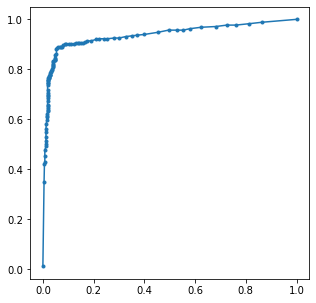

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(FPR_lr, TPR_lr, marker='.')
plt.show()

In [34]:
# Adding KNN here

In [35]:
def kNN(x, X, k, Y):
    X = X - x
    X = X * X
    X = np.sum(X, axis=1)
    X = np.sqrt(X)
    knn_y = Y[np.argsort(X, axis=-1)[0:k]]
    return knn_y

In [36]:
def compute_metrics(Y_predict, Y, c = 0.5):
    Y_predict = (Y_predict >= c) + 0
    tp = np.sum(np.logical_and(Y==1, Y_predict.T==1))
    fp = np.sum(np.logical_and(Y==0, Y_predict.T==1))
    tn = np.sum(np.logical_and(Y==0, Y_predict.T==0))
    fn = np.sum(np.logical_and(Y==1, Y_predict.T==0))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return tp, tn, fp, fn, accuracy, precision, recall

In [37]:
def predict(X, Y, X_test, k):
    y_test = []
    for x in X_test:
        knn = kNN(x, X, k, Y)
        y_test.append(np.sum(knn)/k)
    return np.array(y_test)

In [38]:
Y_predict = predict(X_train1, Y_train1, X_test1, 5)

In [39]:
TPR_knn = []
FPR_knn = []

In [40]:
for c in np.arange(0.00, 1.01, 0.01):
    tp, tn, fp, fn, accuracy, precision, recall = compute_metrics(Y_predict, Y_test1.T[0], c)
    TPR_knn.append(tp/(tp+fn))
    FPR_knn.append(fp/(fp+tn))
TPR_knn.append(0)
FPR_knn.append(0)

In [41]:
tp, tn, fp, fn, accuracy, precision, recall = compute_metrics(Y_predict, Y_test1.T[0], 1.0)
tp, tn, fp, fn, accuracy, precision, recall

(217, 601, 51, 131, 0.818, 0.8097014925373134, 0.6235632183908046)

In [42]:
tp/(tp+fn)

0.6235632183908046

In [43]:
fp/(fp+tn)

0.07822085889570553

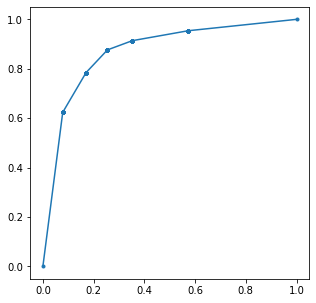

In [44]:
plt.figure(figsize=(5, 5))
plt.plot(FPR_knn, TPR_knn, marker='.')
plt.show()

In [45]:
# Joining both the plots

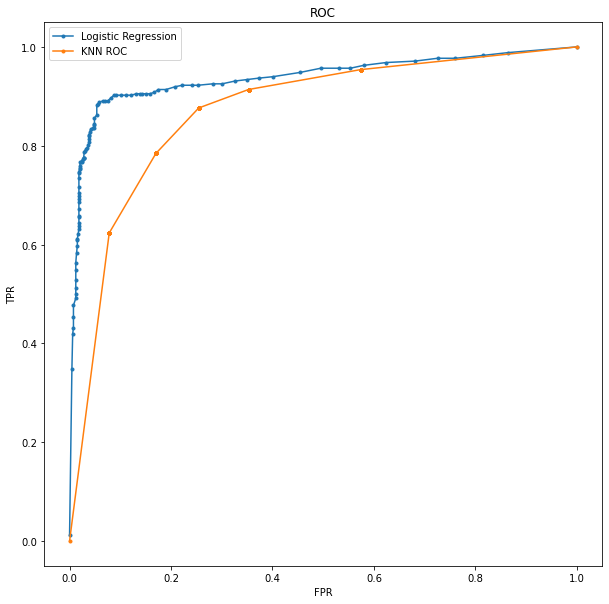

In [67]:
plt.figure(figsize=(10, 10))
plt.plot(FPR_lr, TPR_lr, marker='.', label='Logistic Regression')
plt.plot(FPR_knn, TPR_knn, marker='.', label='KNN ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.savefig("P5_ROC_LR_VS_KNN.png")
plt.show()

# Q5: ROC curve

In [50]:
TPR = [1/6,2/6,3/6,3/6,4/6,4/6,5/6,5/6,1,1]
FPR = [0,0,0,1/4,1/4,2/4,2/4,3/4,3/4,1]

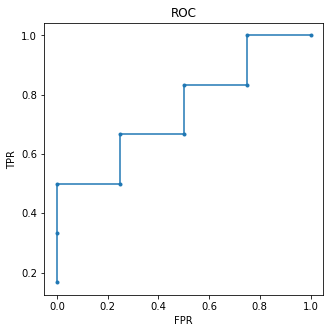

In [51]:
plt.figure(figsize=(5, 5))
plt.plot(FPR, TPR, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.savefig("Q5_ROC.png")
plt.show()

In [52]:
math.sqrt((1/6)*(1/6) + (3/4)*(3/4))

0.768295371441074

In [73]:
0.1 / (1+math.e*math.e)

0.011920292202211758

In [69]:
math.e

2.718281828459045

In [70]:
math.e**2

7.3890560989306495

In [71]:
0.3/8.3890

0.0357611157468113